# Praca domowa 6

## Zadanie 1


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com//MI2-Education//2023L-ExploratoryDataAnalysis//main//homeworks//hw6//house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [134]:
med = df.grade.median()
df.price[(df.waterfront != 0) & (df.grade >= med)].mean()

1784151.7006802722

Odp: 1784151.7006802722

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [135]:
df.bathrooms[df.floors == 2.0].median() > df.bathrooms[df.floors == 3.0].median()

False

Odp: False

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [136]:
df.loc[df.lat > ((df.lat.max()+df.lat.min())/2)].groupby("waterfront").grade.describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,16198.0,7.719965,1.217724,1.0,7.0,8.0,8.0,13.0
1,115.0,9.139130,1.695644,5.0,8.0,9.0,10.0,12.0


Odp: kwartyl 0.25: bez widoku: 7.0, z widokiem: 8.0;           kwartyl 0.75: bez widoku: 8.0, z widokiem: 10.0

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [139]:
print(df.groupby("zipcode").id.count().sort_values(ascending = False).head(1))
np.percentile(df.loc[df.zipcode == 98103, "price"], 75) - np.percentile(df.loc[df.zipcode == 98103, "price"], 25)


zipcode
98103    602
Name: id, dtype: int64


262875.0

Odp: kod 98103;  rozstęp 262875

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [140]:
df[df.sqft_lot15>df.sqft_lot].id.count()/df.id.count()*100

39.513255910794435

Odp: 39.513%

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [141]:
NW = df.loc[(df.lat > ((df.lat.max()+df.lat.min())/2)) & (df.long < (df.long.max()+df.long.min())/2)].id.count() 
SE = df.loc[(df.lat < ((df.lat.max()+df.lat.min())/2)) & (df.long > (df.long.max()+df.long.min())/2)].id.count()
abs(NW-SE)/SE*100

18343.529411764706

Odp: o ok. 18343.53%

# Zadanie 2

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

a)

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

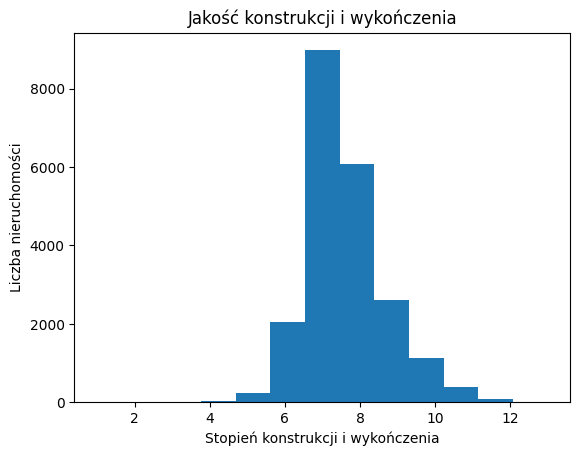

In [143]:
plt.hist(df.grade, bins = 13)
plt.title("Jakość konstrukcji i wykończenia")
plt.xlabel("Stopień konstrukcji i wykończenia")
plt.ylabel("Liczba nieruchomości")
plt.show()

b)

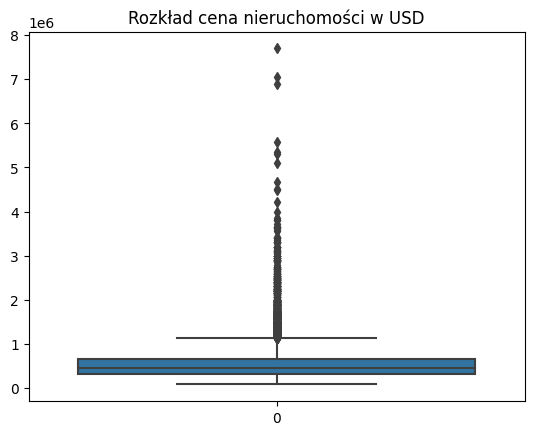

In [144]:
sns.boxplot(df.price)
plt.title("Rozkład cena nieruchomości w USD")
plt.show()

c)

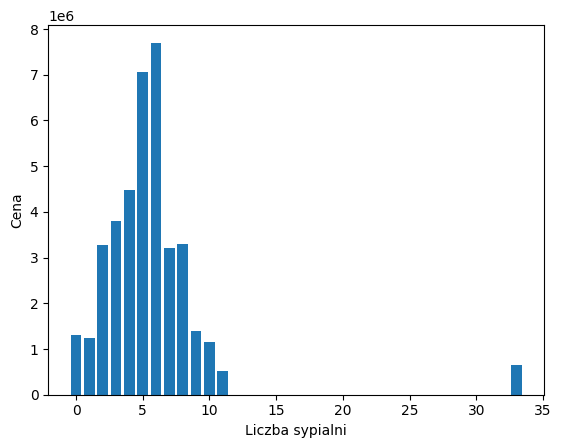

In [145]:
plt.bar(df.bedrooms, df.price)
plt.xlabel("Liczba sypialni")
plt.ylabel("Cena")
plt.show()